<a href="https://colab.research.google.com/github/AleksandraJuras2000/Kurs_Udemi_nn/blob/main/04_klasyfikacja/klasyfikacja_wieloklasowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

np.set_printoptions(precision=6, suppress=True)

In [2]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip

--2025-02-24 15:16:43--  https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 108.177.11.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540232238 (1.4G) [application/x-zip-compressed]
Saving to: ‘flying-vehicles.zip’

flying-vehicles.zip 100%[===================>]   1.43G  35.6MB/s    in 41s     

2025-02-24 15:17:25 (35.7 MB/s) - ‘flying-vehicles.zip’ saved [1540232238/1540232238]



In [3]:
!unzip -q flying-vehicles.zip

In [4]:
!rm -rf ./images

In [5]:
base_dir = './data/planes'
raw_no_of_files = {}
classes = ['drone', 'fighter-jet', 'helicopter', 'missile', 'passenger-plane', 'rocket']
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('drone', 1332), ('fighter-jet', 1867), ('helicopter', 1387), ('missile', 1334), ('passenger-plane', 1424), ('rocket', 1186)])

In [6]:
data_dir = './images'

In [7]:
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')    # katalog zbioru treningowego
valid_dir = os.path.join(data_dir, 'valid')    # katalog zbioru walidacyjnego
test_dir = os.path.join(data_dir, 'test')      # katalog zbioru testowego

train_drone_dir = os.path.join(train_dir, 'drone')
train_passenger_dir = os.path.join(train_dir, 'passenger')
train_helicopter_dir = os.path.join(train_dir, 'helicopter')

valid_drone_dir = os.path.join(valid_dir, 'drone')
valid_passenger_dir = os.path.join(valid_dir, 'passenger')
valid_helicopter_dir = os.path.join(valid_dir, 'helicopter')

test_drone_dir = os.path.join(test_dir, 'drone')
test_passenger_dir = os.path.join(test_dir, 'passenger')
test_helicopter_dir = os.path.join(test_dir, 'helicopter')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_drone_dir, train_passenger_dir, train_helicopter_dir,
        valid_drone_dir, valid_passenger_dir, valid_helicopter_dir,
        test_drone_dir, test_passenger_dir, test_helicopter_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [8]:
drone_fnames = os.listdir(os.path.join(base_dir, 'drone'))
passenger_fnames = os.listdir(os.path.join(base_dir, 'passenger-plane'))
helicopter_fnames = os.listdir(os.path.join(base_dir, 'helicopter'))

drone_fnames = [fname for fname in drone_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
passenger_fnames = [fname for fname in passenger_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
helicopter_fnames = [fname for fname in helicopter_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

In [11]:
size = min(len(drone_fnames), len(passenger_fnames), len(helicopter_fnames))

In [17]:
size

1312

In [13]:
train_size = int(np.floor(0.7 * size))  # Funkcja np.floor() zaokrągla liczbę w dół do najbliższej liczby całkowitej
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [21]:
train_size, valid_size, test_size

(918, 262, 132)

In [22]:
for i, fname in enumerate(drone_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(train_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(valid_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(test_drone_dir, fname)
        shutil.copyfile(src, dst)

for i, fname in enumerate(passenger_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(train_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(valid_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(test_passenger_dir, fname)
        shutil.copyfile(src, dst)

for i, fname in enumerate(helicopter_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(train_helicopter_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(valid_helicopter_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(test_helicopter_dir, fname)
        shutil.copyfile(src, dst)

print('drone - zbiór treningowy', len(os.listdir(train_drone_dir)))
print('drone - zbiór walidacyjny', len(os.listdir(valid_drone_dir)))
print('drone - zbiór testowy', len(os.listdir(test_drone_dir)))

print('passenger - zbiór treningowy', len(os.listdir(train_passenger_dir)))
print('passenger - zbiór walidacyjny', len(os.listdir(valid_passenger_dir)))
print('passenger - zbiór testowy', len(os.listdir(test_passenger_dir)))

print('helicopter - zbiór treningowy', len(os.listdir(train_helicopter_dir)))
print('helicopter - zbiór walidacyjny', len(os.listdir(valid_helicopter_dir)))
print('helicopter - zbiór testowy', len(os.listdir(test_helicopter_dir)))

drone - zbiór treningowy 919
drone - zbiór walidacyjny 262
drone - zbiór testowy 131
passenger - zbiór treningowy 919
passenger - zbiór walidacyjny 262
passenger - zbiór testowy 131
helicopter - zbiór treningowy 919
helicopter - zbiór walidacyjny 262
helicopter - zbiór testowy 131


## Eksploracja Danych

(-0.5, 1199.5, 856.5, -0.5)

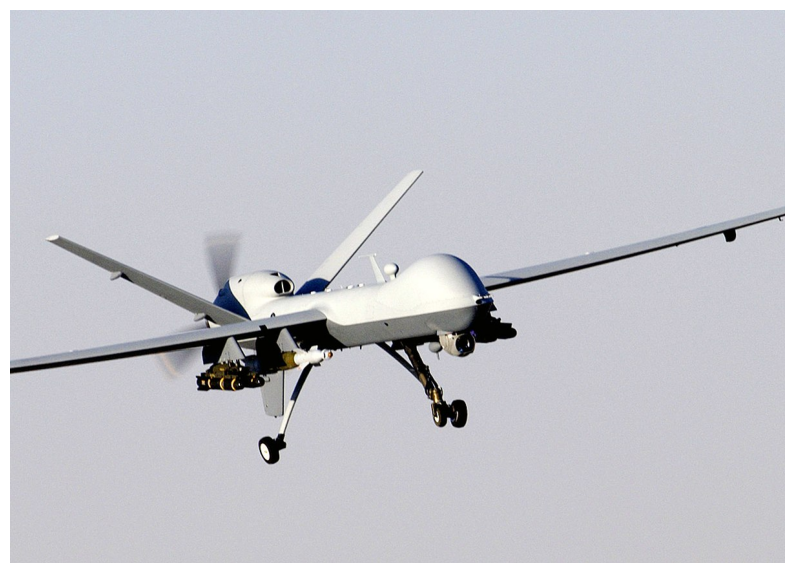

In [23]:
#@title Wybierz indeks przykładowego zdjęcia drona ze zbioru treningowego:

idx = 694 #@param {type:'slider', min:0, max:919}
names_mapping = dict(enumerate(drone_fnames))
img_path = os.path.join(train_drone_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 539.5, 359.5, -0.5)

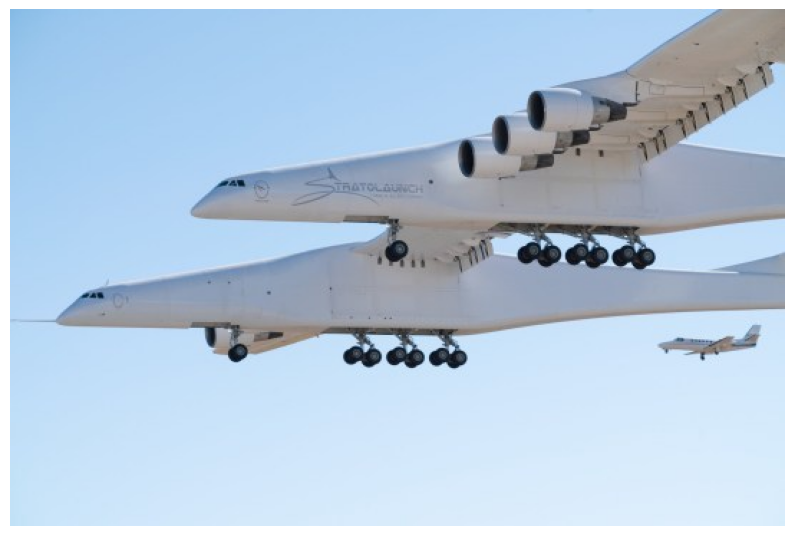

In [25]:
#@title Wybierz indeks przykładowego zdjęcia drona ze zbioru treningowego:

idx = 694 #@param {type:'slider', min:0, max:919}
names_mapping = dict(enumerate(passenger_fnames))
img_path = os.path.join(train_passenger_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 1199.5, 799.5, -0.5)

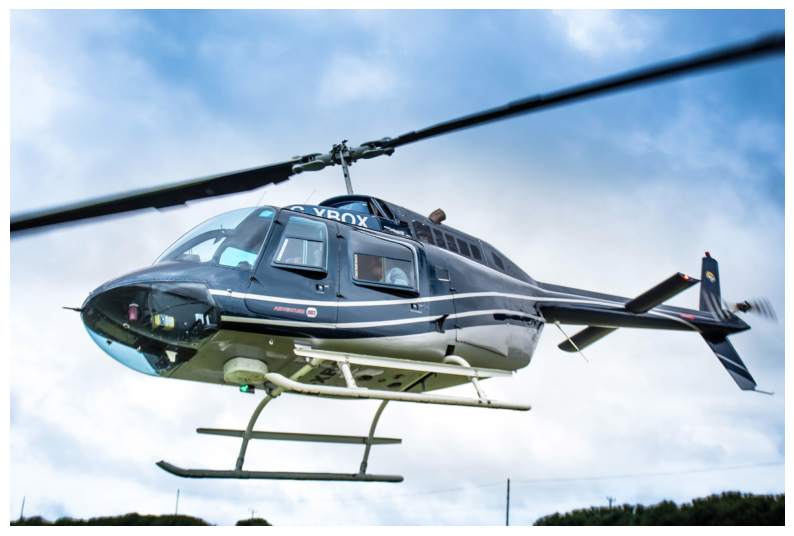

In [26]:
#@title Wybierz indeks przykładowego zdjęcia drona ze zbioru treningowego:

idx = 694 #@param {type:'slider', min:0, max:919}
names_mapping = dict(enumerate(helicopter_fnames))
img_path = os.path.join(train_helicopter_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

## Augmentacja

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=40,      # zakres kąta o który losowo zostanie wykonany obrót obrazów
    rescale=1./255.,
    width_shift_range=0.2,  # pionowe przekształcenia obrazu
    height_shift_range=0.2, # poziome przekształcenia obrazu
    shear_range=0.2,        # zares losowego przycianania obrazu
    zoom_range=0.2,         # zakres losowego przybliżania obrazu
    horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
    fill_mode='nearest'     # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń
)

# przeskalowujemy wszystkie obrazy o współczynnik 1/255
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical')  # wczesniej był binary teraz jest categorical

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 2757 images belonging to 3 classes.
Found 786 images belonging to 3 classes.


In [29]:
def display_augmented_images(directory, idx):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

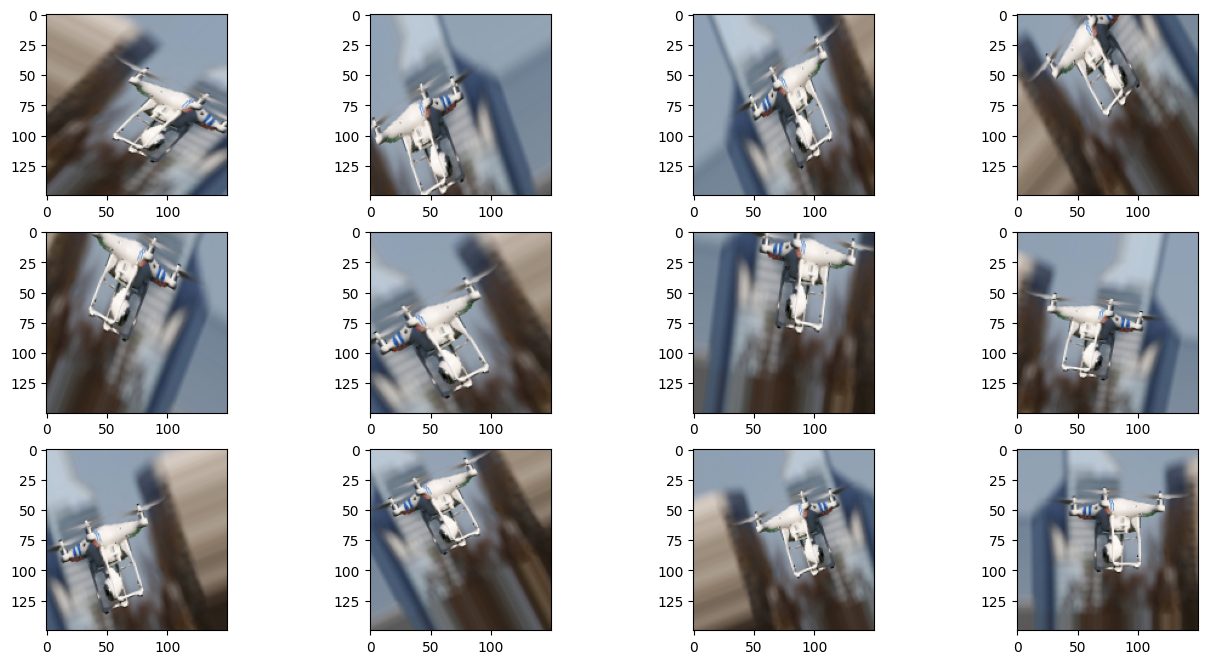

In [40]:
#@title Zbiór treningowy drone:
idx = 114 #@param {type:'slider', min:0, max:919}
display_augmented_images(train_drone_dir, idx)

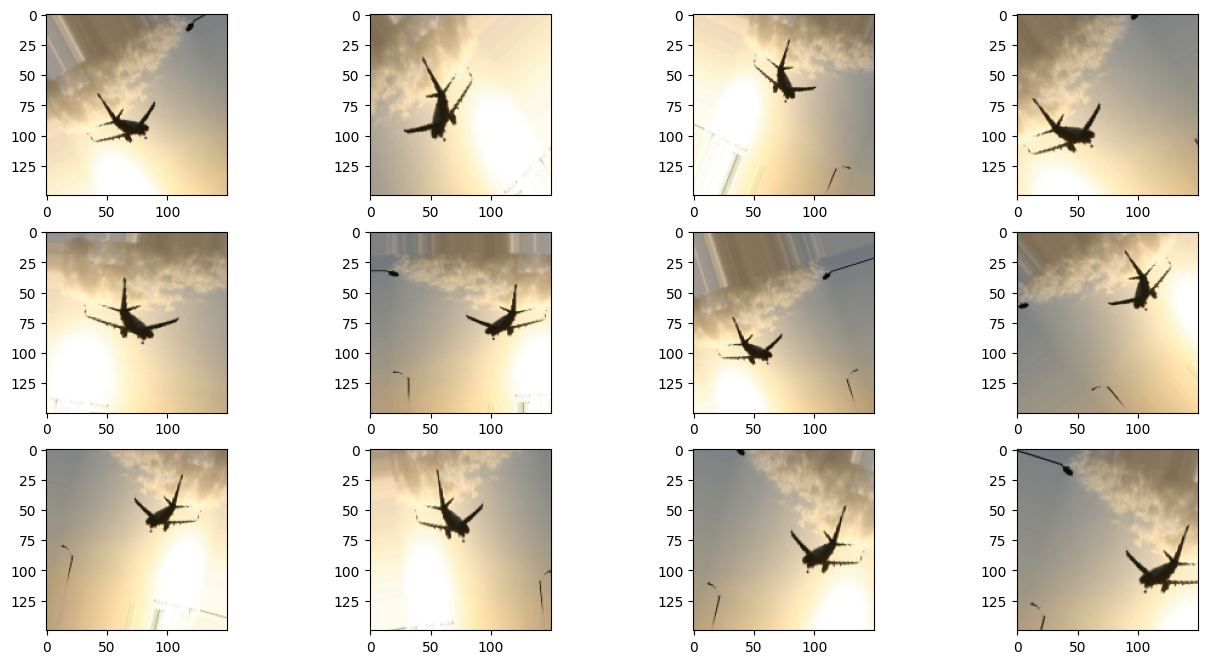

In [37]:
#@title Zbiór treningowy passenger:
idx = 907 #@param {type:'slider', min:0, max:919}
display_augmented_images(train_passenger_dir, idx)

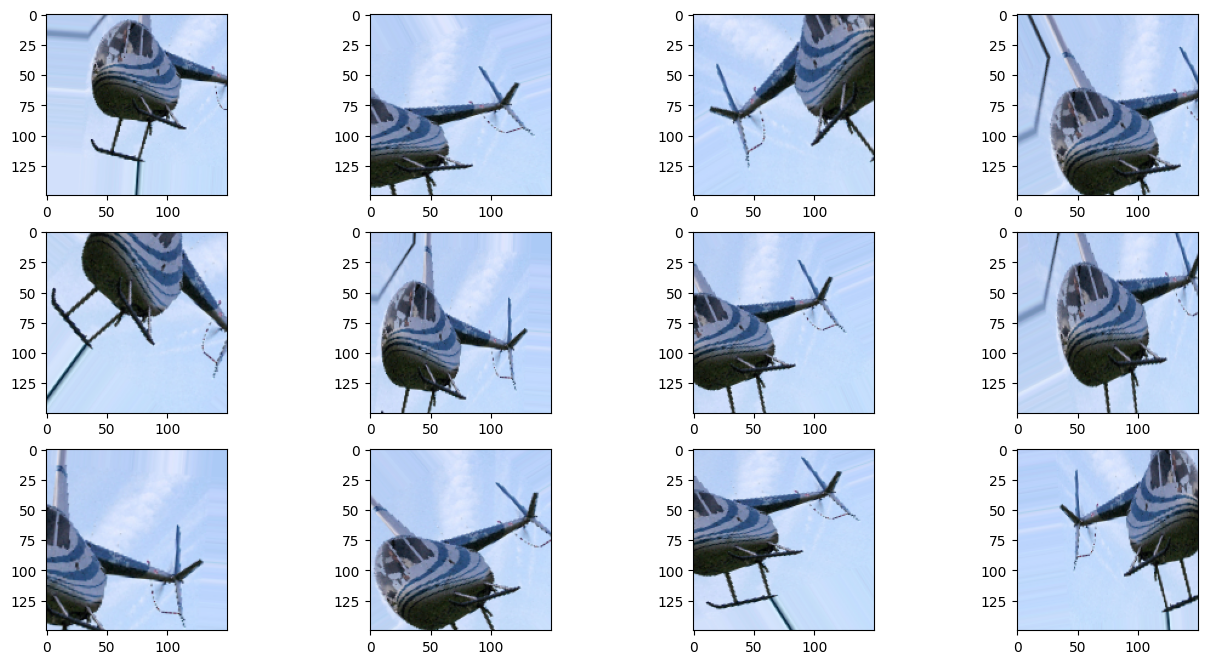

In [34]:
#@title Zbiór treningowy passenger:
idx = 532 #@param {type:'slider', min:0, max:919}
display_augmented_images(train_helicopter_dir, idx)

## Budowa modelu

In [42]:
batch_size = 32 # rozmiar wsadu
steps_per_epoch = train_size // batch_size  #kroki na epokę
validation_steps = valid_size // batch_size #kraki w procesie walidacji

## Transfer learning - model VGG19 - odmrożenie kilku ostatnich warstw

In [44]:
from tensorflow.keras.applications import VGG19

In [45]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')

print_layers(conv_base)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
layer_name: input_layer   trainable: True
layer_name: block1_conv1  trainable: True
layer_name: block1_conv2  trainable: True
layer_name: block1_pool   trainable: True
layer_name: block2_conv1  trainable: True
layer_name: block2_conv2  trainable: True
layer_name: block2_pool   trainable: True
layer_name: block3_conv1  trainable: True
layer_name: block3_conv2  trainable: True
layer_name: block3_conv3  trainable: True
layer_name: block3_conv4  trainable: True
layer_name: block3_pool   trainable: True
layer_name: block4_conv1  trainable: True
layer_name: block4_conv2  trainable: True
layer_name: block4_conv3  trainable: True
layer_name: block4_conv4  trainable: True
layer_name: block4_pool   trainable: True
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_conv4  trainable: True
layer_name: block5_pool   trainable: True


In [46]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print_layers(conv_base)

layer_name: input_layer   trainable: False
layer_name: block1_conv1  trainable: False
layer_name: block1_conv2  trainable: False
layer_name: block1_pool   trainable: False
layer_name: block2_conv1  trainable: False
layer_name: block2_conv2  trainable: False
layer_name: block2_pool   trainable: False
layer_name: block3_conv1  trainable: False
layer_name: block3_conv2  trainable: False
layer_name: block3_conv3  trainable: False
layer_name: block3_conv4  trainable: False
layer_name: block3_pool   trainable: False
layer_name: block4_conv1  trainable: False
layer_name: block4_conv2  trainable: False
layer_name: block4_conv3  trainable: False
layer_name: block4_conv4  trainable: False
layer_name: block4_pool   trainable: False
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_conv4  trainable: True
layer_name: block5_pool   trainable: True


In [48]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))  # 3 jednostki bo 3 kategorie i oczywiscie funkcja softmax bo mamy wiecej niz 2 klasy

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,122,563 (84.39 MB)

 Trainable params: 11,537,411 (44.01 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [50]:
help(model.fit)

Help on method fit in module keras.src.backend.tensorflow.trainer:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1) method of keras.src.models.sequential.Sequential instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It can be:
            - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
            - A backend-native tensor, or a list of tensors
            (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
            - A `keras.utils.PyDataset` returning `(inputs, targets)` or
            `(inputs, targets, sample_weight

In [ ]:
history = model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=30,    # 100
                    validation_data=valid_generator,
                    validation_steps=validation_steps)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 296s 11s/step - accuracy: 0.4082 - loss: 1.1326 - val_accuracy: 0.6016 - val_loss: 0.9122
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 299s 11s/step - accuracy: 0.5745 - loss: 0.9227 - val_accuracy: 0.6562 - val_loss: 0.7756
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 319s 11s/step - accuracy: 0.6473 - loss: 0.8191 - val_accuracy: 0.7070 - val_loss: 0.6688
Epoch 4/30
 3/28 ━━━━━━━━━━━━━━━━━━━━ 3:27 8s/step - accuracy: 0.5399 - loss: 0.9367

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5694 - loss: 0.8941 - val_accuracy: 0.7031 - val_loss: 0.6676
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 299s 11s/step - accuracy: 0.6569 - loss: 0.7506 - val_accuracy: 0.7305 - val_loss: 0.6327
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 318s 11s/step - accuracy: 0.7104 - loss: 0.6613 - val_accuracy: 0.7617 - val_loss: 0.5851
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 301s 11s/step - accuracy: 0.7308 - loss: 0.6708 - val_accuracy: 0.7773 - val_loss: 0.5369
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7005 - loss: 0.6650 - val_accuracy: 0.7617 - val_loss: 0.5691
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 324s 12s/step - accuracy: 0.7363 - loss: 0.6328 - val_accuracy: 0.7344 - val_loss: 0.5882
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 305s 11s/step - accuracy: 0.7052 - loss: 0.6426 - val_accuracy: 0.7891 - val_loss: 0.4964
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.7618 - loss: 0.6179 - val_accuracy: 0.7891 - val_lo

In [52]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

## Ocena modelu na zbiorze testowym

In [54]:
test_datagen = ImageDataGenerator(rescale=1./255.)   # tworzymy generator dla danych testowych
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False     # tak aby nasze dane nie były przetasowane
)

y_prob = model.predict(test_generator, test_generator.samples)
y_prob

Found 393 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



393/393 ━━━━━━━━━━━━━━━━━━━━ 88s 224ms/step


array([[0.993682, 0.005641, 0.000677],
       [0.938567, 0.061218, 0.000215],
       [0.918036, 0.023386, 0.058578],
       ...,
       [0.051331, 0.279512, 0.669157],
       [0.022873, 0.001185, 0.975943],
       [0.228877, 0.106888, 0.664235]], dtype=float32)

In [55]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,

In [56]:
predictions  = pd.DataFrame({'class': y_pred})
predictions

class
0        0
1        0
2        0
3        0
4        0
..     ...
388      2
389      2
390      2
391      2
392      2

[393 rows x 1 columns]

In [57]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [58]:
y_pred = predictions['class'].values
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,

In [59]:
test_generator.class_indices

{'drone': 0, 'helicopter': 1, 'passenger': 2}

In [60]:
classes = list(test_generator.class_indices.keys())
classes

['drone', 'helicopter', 'passenger']

In [61]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[104,  18,   9],
       [ 11, 116,   4],
       [ 31,  16,  84]])

In [62]:
def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)

In [63]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

       drone       0.71      0.79      0.75       131
  helicopter       0.77      0.89      0.83       131
   passenger       0.87      0.64      0.74       131

    accuracy                           0.77       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.78      0.77      0.77       393



In [64]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors

y_true  y_pred
drone/00000002.jpg           0       0
drone/00000017.jpg           0       0
drone/00000031.jpg           0       0
drone/00000044.jpg           0       0
drone/00000045.png           0       0
...                        ...     ...
passenger/00001452.jpg       2       2
passenger/00001457.jpg       2       2
passenger/00001458.jpg       2       2
passenger/00001465.jpg       2       2
passenger/00001471.jpg       2       2

[393 rows x 2 columns]

In [65]:
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
errors

y_true  y_pred  is_incorrect
drone/00000002.jpg           0       0             0
drone/00000017.jpg           0       0             0
drone/00000031.jpg           0       0             0
drone/00000044.jpg           0       0             0
drone/00000045.png           0       0             0
...                        ...     ...           ...
passenger/00001452.jpg       2       2             0
passenger/00001457.jpg       2       2             0
passenger/00001458.jpg       2       2             0
passenger/00001465.jpg       2       2             0
passenger/00001471.jpg       2       2             0

[393 rows x 3 columns]

In [66]:
errors[errors['is_incorrect'] == 1].index

Index(['drone/00000095.jpg', 'drone/00000158.png', 'drone/00000219.jpg',
       'drone/00000265.jpg', 'drone/00000271.jpg', 'drone/00000417.jpg',
       'drone/00000541.jpg', 'drone/00000617.jpg', 'drone/00000670.jpg',
       'drone/00000693.jpg', 'drone/00000696.jpg', 'drone/00000731.jpg',
       'drone/00000858.jpg', 'drone/00000906.jpg', 'drone/00001042.jpg',
       'drone/00001051.jpg', 'drone/00001092.png', 'drone/00001112.jpg',
       'drone/00001191.jpg', 'drone/00001239.jpg', 'drone/00001247.jpg',
       'drone/00001252.jpg', 'drone/00001269.jpeg', 'drone/00001344.jpg',
       'drone/00001421.jpg', 'drone/00001422.jpg', 'drone/00001424.jpg',
       'helicopter/00000207.png', 'helicopter/00000288.jpg',
       'helicopter/00000361.jpg', 'helicopter/00000374.jpg',
       'helicopter/00000640.jpg', 'helicopter/00000654.jpg',
       'helicopter/00000730.jpg', 'helicopter/00001098.png',
       'helicopter/00001220.png', 'helicopter/00001229.png',
       'helicopter/00001272.jpg', 'he

(-0.5, 319.5, 179.5, -0.5)

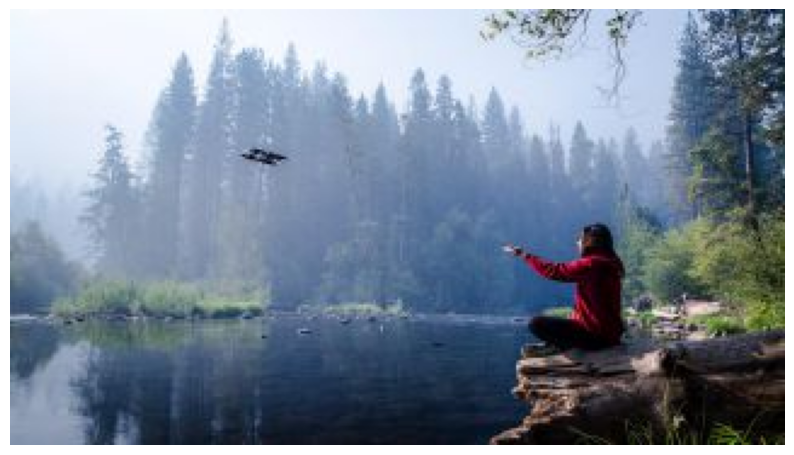

In [69]:
img_path = os.path.join(test_drone_dir, '00000541.jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [70]:
errors[errors['is_incorrect'] == 1].index

Index(['drone/00000095.jpg', 'drone/00000158.png', 'drone/00000219.jpg',
       'drone/00000265.jpg', 'drone/00000271.jpg', 'drone/00000417.jpg',
       'drone/00000541.jpg', 'drone/00000617.jpg', 'drone/00000670.jpg',
       'drone/00000693.jpg', 'drone/00000696.jpg', 'drone/00000731.jpg',
       'drone/00000858.jpg', 'drone/00000906.jpg', 'drone/00001042.jpg',
       'drone/00001051.jpg', 'drone/00001092.png', 'drone/00001112.jpg',
       'drone/00001191.jpg', 'drone/00001239.jpg', 'drone/00001247.jpg',
       'drone/00001252.jpg', 'drone/00001269.jpeg', 'drone/00001344.jpg',
       'drone/00001421.jpg', 'drone/00001422.jpg', 'drone/00001424.jpg',
       'helicopter/00000207.png', 'helicopter/00000288.jpg',
       'helicopter/00000361.jpg', 'helicopter/00000374.jpg',
       'helicopter/00000640.jpg', 'helicopter/00000654.jpg',
       'helicopter/00000730.jpg', 'helicopter/00001098.png',
       'helicopter/00001220.png', 'helicopter/00001229.png',
       'helicopter/00001272.jpg', 'he

(-0.5, 809.5, 439.5, -0.5)

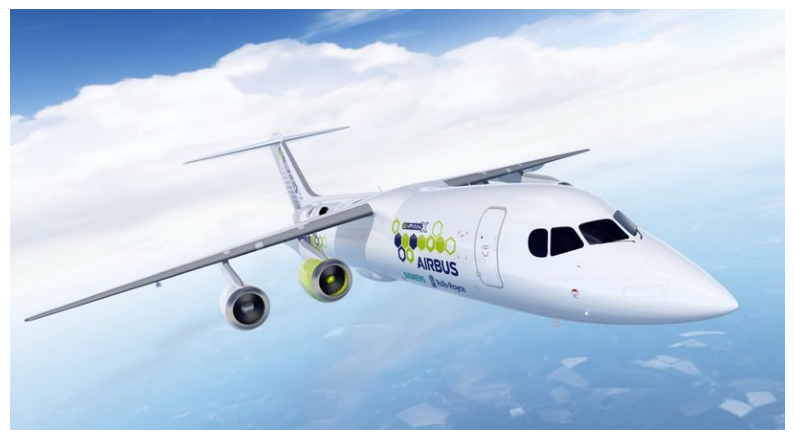

In [74]:
img_path = os.path.join(test_passenger_dir, '00000161.jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [75]:
errors[errors['is_incorrect'] == 1].index

Index(['drone/00000095.jpg', 'drone/00000158.png', 'drone/00000219.jpg',
       'drone/00000265.jpg', 'drone/00000271.jpg', 'drone/00000417.jpg',
       'drone/00000541.jpg', 'drone/00000617.jpg', 'drone/00000670.jpg',
       'drone/00000693.jpg', 'drone/00000696.jpg', 'drone/00000731.jpg',
       'drone/00000858.jpg', 'drone/00000906.jpg', 'drone/00001042.jpg',
       'drone/00001051.jpg', 'drone/00001092.png', 'drone/00001112.jpg',
       'drone/00001191.jpg', 'drone/00001239.jpg', 'drone/00001247.jpg',
       'drone/00001252.jpg', 'drone/00001269.jpeg', 'drone/00001344.jpg',
       'drone/00001421.jpg', 'drone/00001422.jpg', 'drone/00001424.jpg',
       'helicopter/00000207.png', 'helicopter/00000288.jpg',
       'helicopter/00000361.jpg', 'helicopter/00000374.jpg',
       'helicopter/00000640.jpg', 'helicopter/00000654.jpg',
       'helicopter/00000730.jpg', 'helicopter/00001098.png',
       'helicopter/00001220.png', 'helicopter/00001229.png',
       'helicopter/00001272.jpg', 'he

(-0.5, 1199.5, 749.5, -0.5)

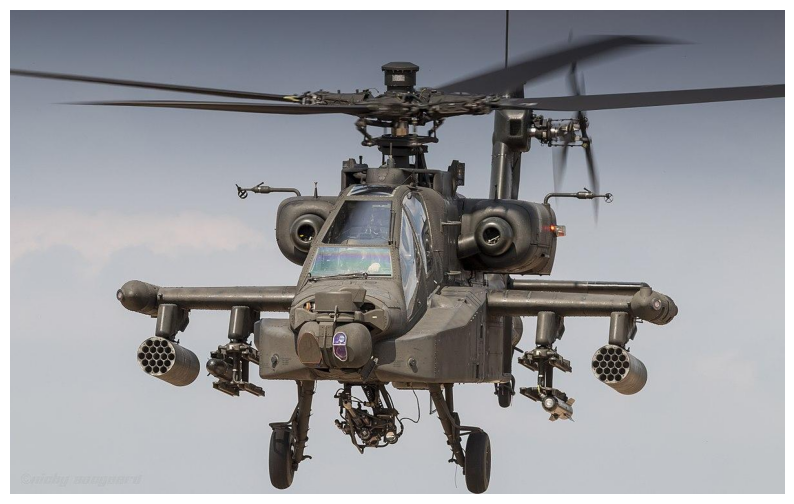

In [78]:
img_path = os.path.join(test_helicopter_dir, '00000288.jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)